# Laboratorio de regresión logística

|                |   |
:----------------|---|
| **Nombre**     |Ana Sofía Avila Gálvez   |
| **Fecha**      |05/10/25   |
| **Expediente** |745247   |

La regresión logística es una herramienta utilizada para predecir respuestas cualitativas. Al igual que la regresión lineal, es un método sencillo que sirve como un punto de partida para técnicas más avanzadas. Por ejemplo, lo que se conoce como *redes neuronales* o *red de perceptrones multicapa* no es más que una estructura de regresiones logísticas que se alimentan entre sí.

1. Descarga el archivo de créditos y carga los datos (Default.csv). Utiliza `pandas`.

In [2]:
import numpy as np
import pandas as pd

In [4]:
data = pd.read_csv("Default.csv")
data

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138950
3,No,No,529.250605,35704.493940
4,No,No,785.655883,38463.495880
...,...,...,...,...
9995,No,No,711.555020,52992.378910
9996,No,No,757.962918,19660.721770
9997,No,No,845.411989,58636.156980
9998,No,No,1569.009053,36669.112360


2. Utiliza el comando `obj.head()`, donde `obj` es el nombre que le diste a los datos del archivo.

In [5]:
data.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138950
3,No,No,529.250605,35704.493940
4,No,No,785.655883,38463.495880


El comando head arroja los primeras *n* líneas (por defecto 5) de los datos que están en el DataFrame.

3. Utiliza el comando `obj.describe()`.

In [6]:
data.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729275
max,2654.322576,73554.233500


El comando describe toma las columnas que tienen datos numéricos y saca datos estadísticos comunes:
- *n*
- media
- desviación estándar
- valor mínimo
- primer cuartil
- mediana
- tercer cuartil
- valor máximo

3. Vistos estos datos, ¿qué columnas existen en el DataFrame? ¿Qué tipo de datos contienen?

balance → contiene datos numéricos (valores de saldo de clientes).

income → contiene datos numéricos (valores de ingresos de clientes).

4. Configura el tipo de dato de las columnas `default` y `student` para cambiarlos a variables categóricas.

`data[columna] = data[columna].astype("category")`

In [7]:
data["default"] = data["default"].astype("category")

In [8]:
data["student"] = data["student"].astype("category")

Imagina que trabajas en un banco y que se te entregan estos datos. Tu objetivo es crear un modelo que ayude a predecir si una persona que solicita un crédito lo va a pagar. Exploremos los datos un poco más antes de crear un modelo.

Veamos primero cómo es la distribución de los valores cuando una persona dejó de pagar y cuando siguió pagando. `Default` es el término utilizado para cuando una persona dejó de pagar.

5. Crea una gráfica de caja para las columnas `income` y `balance`, con los datos agrupados con la columna `default`. Utiliza el comando `obj.boxplot(column=____, by=_____)`

<Axes: title={'center': 'income'}, xlabel='default'>

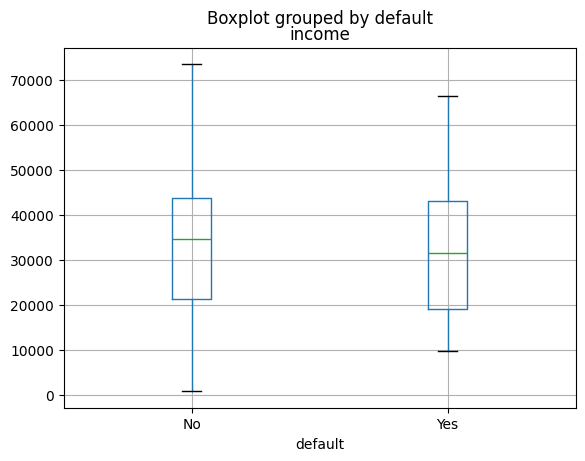

In [9]:
#Income según default
data.boxplot(column="income", by="default")

<Axes: title={'center': 'balance'}, xlabel='default'>

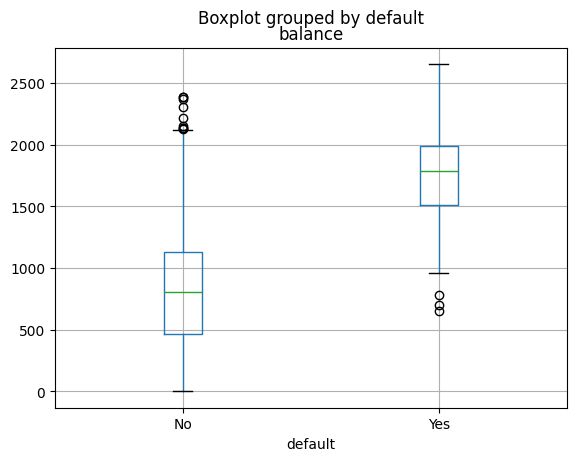

In [10]:
#Balance según default
data.boxplot(column="balance", by="default")

6. Crea una gráfica de dispersión donde el eje *x* sea la columna `balance` y el eje *y* la columna `income`. Utiliza el comando `obj.plot.scatter(x, y, c="default", colormap="PiYG_r", alpha=0.5)`.

<Axes: xlabel='balance', ylabel='income'>

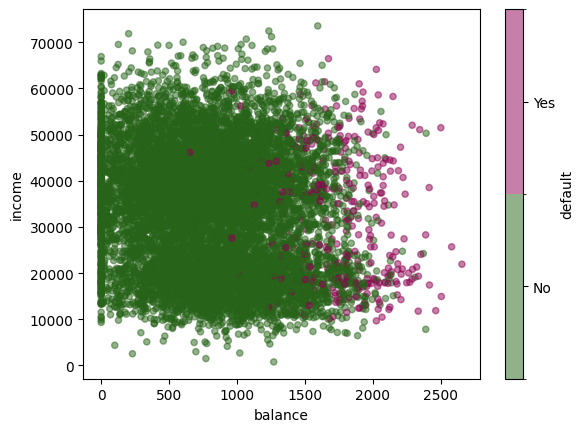

In [11]:
data.plot.scatter(x="balance",y="income",c="default",colormap="PiYG_r",alpha=0.5)

La regresión (lineal o logística) se usa para encontrar una línea que ajuste los datos para tomar una decisión. La línea que buscamos en regresión logística es aquella que nos ayude a separar las diferentes categorías.

<img style="float: left; " src="https://www.baeldung.com/wp-content/uploads/sites/4/2023/10/decision_boundary_curve.jpg" width="400px" />


## Regresión logística simple

Creemos un modelo simple donde sólo utilizamos una de los factores para predecir una respuesta. Quiero conocer la probabilidad de que una persona deje de pagar su crédito dado el balance que tiene en su cuenta.

$$ P(\text{default}=\text{Yes}|\text{balance}) $$

Por el momento la columna default no contiene valores numéricos, por lo que hay que transformar los datos. Como default es nuestra variable de respuesta (lo que queremos predecir) podemos nombrarla *y*.

Ejecuta el código `y = obj["default"] == "Yes"`. Extrae el factor `balance` en una variable *x*.

In [12]:
y = data["default"] == "Yes"

In [13]:
x = data["balance"]

Crea un gráfico de dispersión donde el eje *x* sea `balance` y el eje *y* sea `default` transformado.

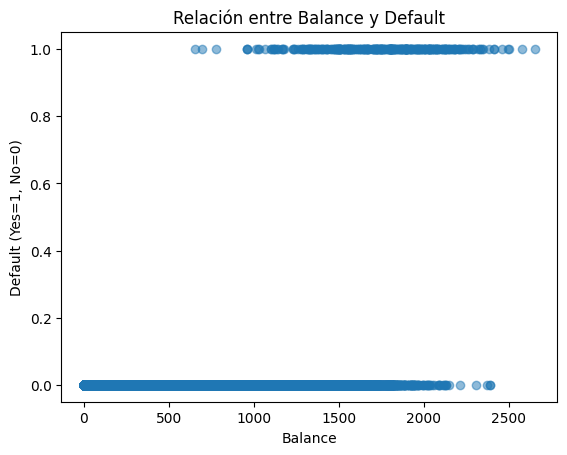

In [14]:
import matplotlib.pyplot as plt

plt.scatter(x, y, alpha=0.5)
plt.xlabel("Balance")
plt.ylabel("Default (Yes=1, No=0)")
plt.title("Relación entre Balance y Default")
plt.show()

La línea que utilizaremos para predecir la probabilidad es:

$$ p(x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x)}} $$

Para nuestro ejemplo de pagos y balance:

$$ P(\text{default}=1|\text{balance}) = \frac{1}{1 + e^{-(\beta_0 + \beta_1  \text{balance})}} $$

Buscamos maximizar la probabilidad de que el modelo tome decisiones correctas. Es decir, que cuando `default` fue verdadero, que la predicción sea 100%, y que cuando `default` fue falso que la predicción sea 0%.

$$ \Pi_{i:y_i=1} p(x_i) \Pi_{i':y_{i'}} (1-p(x_{i'})) $$

La función de costo ya simplificada es la siguiente:

$$ J(\vec{\beta}) = -  \sum_{i=1}^n{[y_i \ln{(\hat{p}(x_i))} + (1-y_i)\ln{(1 - \hat{p}(x_i))}]}$$

Utiliza la clase `LogisticRegression` del módulo `linear_model` de la librería `sklearn` para estimar los parámetros del modelo.

In [15]:
from sklearn.linear_model import LogisticRegression
import numpy as np


X = data[["balance"]]
y = (data["default"] == "Yes")

In [16]:
#Modelo
log_reg = LogisticRegression()

In [17]:
log_reg.fit(X, y)

LogisticRegression()

In [18]:
log_reg.intercept_,log_reg.coef_

(array([-10.65132824]), array([[0.00549892]]))

Muchos aspectos de la regresión logística son similares a la regresión lineal. Podemos medir la precisión de nuestros estimados calculando sus errores estándar. El objetivo de calcular estos errores es asegurar que hay una relación estadísticamente significativa entre el factor y la variable de respuesta.

Los errores estándar se obtienen con el siguiente procedimiento:

1. Calcula las predicciones utilizando los $\beta_0$ y $\beta_1$ encontrados.

In [20]:
beta0 = log_reg.intercept_[0]
beta1 = log_reg.coef_[0][0]

In [21]:
p = 1 / (1 + np.exp(-(beta0 + beta1 * data["balance"])))

In [22]:
print(p.head())

0    0.001306
1    0.002113
2    0.008595
3    0.000434
4    0.001777
Name: balance, dtype: float64


2. Idealmente la probabilidad debería ser 100% o 0%. Si alguna predicción no fue absoluta significa que hay incertidumbre. Calcula $p(1-p)$ para todas tus predicciones.

In [24]:
incertidumbre = p * (1 - p)

In [25]:
print(incertidumbre.head())

0    0.001304
1    0.002108
2    0.008521
3    0.000434
4    0.001774
Name: balance, dtype: float64


3. Crea una matriz vacía y llena la diagonal con las probabilidades encontradas.

`V = np.diagflat(*p(1-p)*)`

In [28]:
V = np.diagflat(p * (1 - p))

4. Calcula la matriz de covarianza. (Dado que X es la matriz que contiene todos los factores)

`cov = np.linalg.inv(X.T @ V @ X)`

In [30]:
X = np.c_[np.ones(len(data)), data["balance"]]

In [31]:
cov = np.linalg.inv(X.T @ V @ X)

In [33]:
cov

array([[ 1.30442757e-01, -7.81757265e-05],
       [-7.81757265e-05,  4.85656561e-08]])

5. Los valores en la diagonal de la matriz de covarianza corresponden a la varianza de los factores. Utiliza los valores de la diagonal para calcular el error estándar.

`se = np.sqrt(np.diag(cov))`

In [34]:
se = np.sqrt(np.diag(cov))

In [35]:
se

array([3.61168600e-01, 2.20376169e-04])

Ahora, revisemos si los estimados de nuestros coeficientes demuestran que hay una relación significativa entre los factores y la respuesta.

Calculamos el estadístico *z*

$$ z_j = \frac{\hat{\beta_j}}{\text{SE}(\hat{\beta_j})} $$

In [36]:
betas = np.array([beta0, beta1])

In [41]:
betas

array([-1.06513282e+01,  5.49891555e-03])

In [37]:
z = betas / se

In [40]:
z

array([-29.49129089,  24.95240552])

Utilizamos el estadístico *z* para encontrar el *p-value*.

`from scipy.stats import norm`

`p_value = 2 * (1 - norm.cdf(abs(z_statistic)))`

In [42]:
from scipy.stats import norm

In [43]:
p_values = 2 * (1 - norm.cdf(abs(z)))

In [45]:
p_values

array([0., 0.])

¿Es significativa la relación de los factores con la variable de respuesta?

Sí, la relación es estadísticamente significativa, porque los p-values son menores a 0.05.
El coeficiente asociado al balance es significativo, lo que dice que el balance tiene un efecto real en la probabilidad de que una persona haga default.

Repite el procedimiento con el factor `student`.
1. Transforma el factor de {"Yes", "No"} a {1, 0}.
2. Estima los coeficientes.
3. Calcula el error estándar de tus estimaciones.
   1. Usa tu modelo para encontrar $\hat{p}(X)$
   2. Calcula el error $p(1-p)$
   3. Calcula la matriz de covarianza
   4. Extrae el error estándar
5. Argumenta si los factores son significativos utilizando el *p-value*.
   1. Utiliza el error estándar para calcular el estadístico *z*
   2. Calcula el *p-value*
   3. ¿Son significativos?


In [67]:
data["student_num"] = (data["student"] == "Yes").astype(int)
y = (data["default"] == "Yes").astype(int)

In [68]:
X_student = data[["student_num"]]

In [69]:
# Modelo
log_reg_student = LogisticRegression()
log_reg_student.fit(X_student, y)

LogisticRegression()

In [70]:
#Coeficientes
intercepto = log_reg_student.intercept_[0]
coef_student = log_reg_student.coef_[0][0]

In [71]:
intercepto

np.float64(-3.502572491853133)

In [72]:
coef_student

np.float64(0.3962088847686549)

In [73]:
p = 1 / (1 + np.exp(-(intercepto + coef_student * data["student_num"])))

In [74]:
incertidumbre = p * (1 - p)

In [75]:
V = np.diagflat(incertidumbre)
X = np.c_[np.ones(len(data)), data["student_num"]]
cov = np.linalg.inv(X.T @ V @ X)

In [76]:
error_std = np.sqrt(np.diag(cov))
error_std

array([0.07066143, 0.11522061])

In [77]:
coeficientes = np.array([intercepto, coef_student])
z_estad = coeficientes / error_std
p_valores = 2 * (1 - norm.cdf(abs(z_estad)))

In [78]:
coeficientes

array([-3.50257249,  0.39620888])

In [79]:
z_estad

array([-49.56838058,   3.4386979 ])

In [80]:
p_valores

array([0.        , 0.00058452])

¿Son significativos?

La variable student es **significativa** en el modelo, ya que su p-valor (0.00058) es menor a 0.05. Esto nos dice que ser estudiante influye de manera estadísticamente significativa en la probabilidad de incumplir el pago del crédito.

## Regresión logística múltiple

Considera ahora el caso de múltiples factores. Intentemos predecir si la persona dejará de pagar su crédito utilizando toda la información que tenemos disponible. I.e.

$$ P(\text{default}=1|\text{balance}, \text{income}, \text{student}) = \frac{1}{1 + e^{-(\beta_0 + \beta_1  \text{balance} + \beta_2 \text{income} + \beta_3 \text{student})}} $$

1. Utiliza `LogisticRegression` para estimar los coeficientes.
2. Calcula el error estándar de tus estimaciones.
3. Argumenta si los factores son significativos utilizando el *p-value*.

***Estimar coeficientes***

In [82]:
y = (data["default"] == "Yes").astype(int)
data["student_num"] = (data["student"] == "Yes").astype(int)
X_multi = data[["balance", "income", "student_num"]]

In [83]:
#Modelo
log_reg_multi = LogisticRegression()
log_reg_multi.fit(X_multi, y)

LogisticRegression()

In [85]:
intercepto = log_reg_multi.intercept_[0]
coef_balance, coef_income, coef_student = log_reg_multi.coef_[0]

In [86]:
intercepto

np.float64(-10.901807847686797)

In [87]:
coef_balance

np.float64(0.005730611086452223)

In [88]:
coef_income

np.float64(3.9616325789739715e-06)

In [89]:
coef_student

np.float64(-0.6125728067564002)

***Error estándar de estimaciones***

In [90]:
p = log_reg_multi.predict_proba(X_multi)[:,1]

In [91]:
incertidumbre = p * (1 - p)

In [92]:
V = np.diagflat(incertidumbre)
X = np.c_[np.ones(len(X_multi)), X_multi]
cov = np.linalg.inv(X.T @ V @ X)

In [93]:
error_std = np.sqrt(np.diag(cov))
error_std

array([4.93158470e-01, 2.31675571e-04, 8.20844359e-06, 2.36393913e-01])

***Prubas de significancia***

In [94]:
coeficientes = np.array([intercepto, coef_balance, coef_income, coef_student])

In [95]:
z_estad = coeficientes / error_std
z_estad

array([-22.10609473,  24.73549998,   0.48262896,  -2.59132225])

In [96]:
p_valores = 2 * (1 - norm.cdf(abs(z_estad)))
p_valores

array([0.        , 0.        , 0.62935921, 0.00956079])

¿Son significativos?

Los resultados dicen que balance y student son significativos (p < 0.05), por lo que influyen en la probabilidad de default. En cambio, income no es significativo (p > 0.05), por lo que no tiene un efecto claro en el modelo.

¿Cómo sabemos qué tan bueno es el modelo? Hay cuatro posibles casos para un problema de clasificación simple:
- Era sí y se predijo sí. (Verdadero positivo **TP**)
- Era sí y se predijo no. (Falso negativo **FN**)
- Era no y se predijo sí. (Falso positivo **FP**)
- Era no y se predijo no. (Verdadero negativo **TN**)

De esos cuatro casos hay dos donde el modelo es correcto y dos donde el modelo no es correcto.

![](https://miro.medium.com/v2/resize:fit:720/format:webp/1*IuymDnZpRlkat0qejE26Nw.png)

1. Menciona dos ejemplos donde consideres que un falso positivo sea un peor resultado que un falso negativo.

***Ejemplo 1***

En un banco, un falso positivo (dar crédito a alguien que no pagará) es peor que un falso negativo (negar crédito a alguien que sí pagaría), porque implica pérdida de dinero.

***Ejemplo 2***


En un filtro de correo, un falso positivo (marcar un correo importante como spam) es peor que un falso negativo (dejar pasar spam), porque se pierde información valiosa.

2. Menciona dos ejemplos donde consideres que un falso negativo sea un peor resultado que un falso positivo.

***Ejemplo 1***

En medicina, un falso negativo en detección de cáncer es peor porque se deja sin tratamiento a un paciente enfermo.

***Ejemplo 2***

En un detector de incendios, un falso negativo es peor porque no se activa la alarma y pone vidas en riesgo.

## Referencia

James, G., Witten, D., Hastie, T., Tibshirani, R.,, Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Cham: Springer. ISBN: 978-3-031-38746-3